In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('../../base_de_dados_clusterizacao.csv', low_memory=False)
df

Consulta Pre-Natal  Consulta Medica Em Atençao Basica  \
0                0.000000                           0.136364   
1                0.000000                           0.863636   
2                0.259259                           0.181818   
3                0.000000                           0.045455   
4                0.222222                           0.000000   
...                   ...                                ...   
24911            0.000000                           0.000000   
24912            0.000000                           0.000000   
24913            0.000000                           0.000000   
24914            0.037037                           0.000000   
24915            0.000000                           0.000000   

       Consulta De Profissionais De Nivel Superior Na Atenção Básica (Exceto Médico)  \
0                                                0.28125                               
1                                                0.46875                               
2                                                0.40625                               
3                                                0.03125                               
4                                                0.21875                               
...                                                  ...                               
24911                                            0.00000                               
24912                                            0.00000                               
24913                                            0.00000                               
24914                                            0.00000                               
24915                                            0.00000                               

       Atendimento De Urgência Em Atenção Básica  \
0                                       0.541284   
1                                       0.119266   
2                                       0.100917   
3                                       1.000000   
4                                       0.385321   
...                                          ...   
24911                                   0.000000   
24912                                   0.000000   
24913                                   0.009174   
24914                                   0.000000   
24915                                   0.009174   

       Supervisão De Gravidez Normal, Não Especificada  \
0                                               0.0000   
1                                               0.0000   
2                                               0.1250   
3                                               0.0000   
4                                               0.0625   
...                                                ...   
24911                                           0.0000   
24912                                           0.0000   
24913                                           0.0000   
24914                                           0.0000   
24915                                           0.0000   

       Visita Domiciliar Por Profissional De Nível Médio  \
0                                               0.350877   
1                                               0.000000   
2                                               0.403509   
3                                               0.000000   
4                                               0.000000   
...                                                  ...   
24911                                           0.000000   
24912                                           0.000000   
24913                                           0.000000   
24914                                           0.000000   
24915                                           0.000000   

       Supervisão De Gravidez Normal  Ultra-Sonografia Obstetrica  \
0                                0.0                        0.000   


In [205]:
print(df.dtypes.unique())

[dtype('int64')]


In [206]:
ss=StandardScaler()

In [208]:
ss.fit(df)

StandardScaler()

In [210]:
scaled_df=ss.transform(df)

In [212]:
scaled_df

array([[ 0.7020546 , -1.62914189,  0.27760272, ..., -0.01097356,
        -0.02904381, -0.01097356],
       [ 0.32198822, -1.62914189,  6.7456326 , ..., -0.01097356,
        -0.02904381, -0.01097356],
       [ 0.32198819,  0.3206011 ,  0.68185459, ..., -0.01097356,
        -0.02904381, -0.01097356],
       ...,
       [ 0.70205466, -1.62914189, -0.93515288, ..., -0.01097356,
        -0.02904381, -0.01097356],
       [-2.1793221 , -1.35060717, -0.93515288, ..., -0.01097356,
        -0.02904381, -0.01097356],
       [-2.01733504, -1.62914189, -0.93515288, ..., -0.01097356,
        -0.02904381, -0.01097356]])

### Finding the ideal number of main components

- We try to find the optimal number of components that capture the greatest amount of variance in the data.

In [213]:
pca=PCA()
pca.fit(scaled_df)

PCA()

In [215]:
pca.explained_variance_ratio_

array([3.67167684e-03, 2.88401958e-03, 2.37166549e-03, ...,
       2.82065722e-33, 1.57146694e-33, 1.18166736e-33])

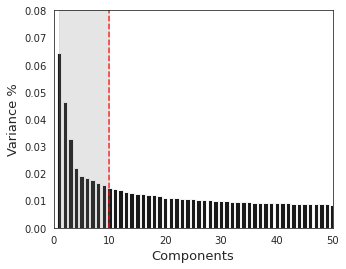

In [217]:
sns.set_style('white')
plt.figure(figsize=(5,4))
plt.bar(x=list(range(1,106)), height=pca.explained_variance_ratio_, color='black', alpha=0.9)
plt.xlabel('Components',fontsize=13)
plt.ylim(0,0.08)
plt.xlim(0,50)
plt.ylabel('Variance %',fontsize=13)
plt.axvline(x=10, color='r', ls='--', alpha=0.8)
plt.axvspan(1,10, color='grey', alpha=0.2)
#plt.title('Variância dos componentes',fontsize=13)
#plt.savefig('variancia.png')
plt.show()

In [218]:
pca=PCA(n_components=10)

In [219]:
pca.fit(scaled_df)

PCA(n_components=10)

In [220]:
X_pca=pca.transform(scaled_df)

In [221]:
X_pca

array([[ 1.49929822e+01,  6.82459778e+01,  2.34554055e+01, ...,
        -2.45989831e+00,  9.52945954e+00,  1.69377246e-01],
       [ 1.46316597e+01,  4.86978574e+01,  4.88626281e+00, ...,
         5.62881670e+00,  1.30078668e+01, -4.25929458e+00],
       [ 1.03805279e+01,  1.60454259e+01, -9.67841920e+00, ...,
         1.00826629e+01,  2.23859454e+01, -1.97286177e+01],
       ...,
       [-1.87416465e+00, -3.15407039e-02,  8.90438713e-01, ...,
         1.03705250e-01,  9.87773327e-01, -4.42140087e-01],
       [-2.02860672e+00, -8.12534062e-01,  5.87673999e-01, ...,
         1.71281710e-01,  6.25236352e-01, -1.95115431e-01],
       [-2.00246628e+00, -8.01864528e-01,  4.24315617e-01, ...,
         1.36743365e-01,  4.92774841e-01, -2.52505957e-01]])

In [222]:
dataf = pd.DataFrame(data=X_pca)
dataf

0          1          2          3          4         5  \
0      14.992982  68.245978  23.455405  -3.750812 -14.691602  3.700462   
1      14.631660  48.697857   4.886263  12.759485   2.993397 -1.898397   
2      10.380528  16.045426  -9.678419  26.236194   9.737309  0.494688   
3      -0.817698   1.416964   0.301234  -1.175479   0.310833 -0.372173   
4       5.784940   0.742676  -2.989768   0.373237  -0.941617  2.060063   
...          ...        ...        ...        ...        ...       ...   
24911  -2.002466  -0.801865   0.424316  -1.636046   0.404696  0.001132   
24912  -1.874165  -0.031541   0.890439  -2.251569   0.567544 -0.478435   
24913  -1.874165  -0.031541   0.890439  -2.251569   0.567544 -0.478435   
24914  -2.028607  -0.812534   0.587674  -1.611832   0.404858  0.038649   
24915  -2.002466  -0.801865   0.424316  -1.636046   0.404696  0.001132   

              6          7          8          9  
0     -9.830332  -2.459898   9.529460   0.169377  
1      2.668788   5.628817  13.007867  -4.259295  
2      5.471378  10.082663  22.385945 -19.728618  
3     -0.070539  -0.745557  -0.103929  -0.575358  
4     -1.053950  -0.581077   2.725682   4.569188  
...         ...        ...        ...        ...  
24911  0.028500   0.136743   0.492775  -0.252506  
24912 -0.406351   0.103705   0.987773  -0.442140  
24913 -0.406351   0.103705   0.987773  -0.442140  
24914  0.035370   0.171282   0.625236  -0.195115  
24915  0.028500   0.136743   0.492775  -0.252506  

[24916 rows x 10 columns]

In [223]:
valores = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], index=df.columns)
valores.head(10)

PC1       PC2  \
Consulta Pre-Natal                                  0.096725 -0.034346   
Supervisão De Gravidez Normal                      -0.000318 -0.082853   
Consulta Medica Em Atençao Basica                   0.125091  0.099814   
Consulta De Profissionais De Nivel Superior Na ...  0.247932  0.030744   
Atendimento De Urgência Em Atenção Básica           0.102538  0.350188   
Visita Domiciliar Por Profissional De Nível Médio   0.049531  0.037721   
Ultra-Sonografia Obstetrica                         0.051709  0.001074   
Consulta Medica Em Atenção Especializada            0.087991  0.113413   
Coleta De Material P/ Exame Laboratorial            0.079433 -0.027012   
Afericao De Pressao Arterial                        0.095465  0.117449   

                                                         PC3       PC4  \
Consulta Pre-Natal                                 -0.083442  0.298665   
Supervisão De Gravidez Normal                       0.124738  0.314342   
Consulta Medica Em Atençao Basica                  -0.146274  0.124398   
Consulta De Profissionais De Nivel Superior Na ... -0.096191  0.052657   
Atendimento De Urgência Em Atenção Básica           0.141281 -0.009867   
Visita Domiciliar Por Profissional De Nível Médio   0.054948  0.215106   
Ultra-Sonografia Obstetrica                        -0.181776  0.057450   
Consulta Medica Em Atenção Especializada           -0.368603 -0.046859   
Coleta De Material P/ Exame Laboratorial           -0.015818  0.361048   
Afericao De Pressao Arterial                       -0.247068  0.194812   

                                                         PC5       PC6  \
Consulta Pre-Natal                                 -0.199225 -0.102988   
Supervisão De Gravidez Normal                      -0.176893  0.079188   
Consulta Medica Em Atençao Basica                   0.097423  0.055879   
Consulta De Profissionais De Nivel Superior Na ...  0.103805 -0.051440   
Atendimento De Urgência Em Atenção Básica          -0.083197  0.026896   
Visita Domiciliar Por Profissional De Nível Médio   0.339022 -0.283193   
Ultra-Sonografia Obstetrica                        -0.054214 -0.064491   
Consulta Medica Em Atenção Especializada           -0.002071  0.122813   
Coleta De Material P/ Exame Laboratorial           -0.011642  0.008293   
Afericao De Pressao Arterial                        0.058709 -0.055142   

                                                         PC7       PC8  \
Consulta Pre-Natal                                 -0.140403  0.068331   
Supervisão De Gravidez Normal                      -0.072570  0.026428   
Consulta Medica Em Atençao Basica                   0.190529 -0.234430   
Consulta De Profissionais De Nivel Superior Na ... -0.021584  0.004203   
Atendimento De Urgência Em Atenção Básica          -0.089021 -0.014564   
Visita Domiciliar Por Profissional De Nível Médio  -0.090072 -0.058796   
Ultra-Sonografia Obstetrica                        -0.044789 -0.015105   
Consulta Medica Em Atenção Especializada            0.000714 -0.059474   
Coleta De Material P/ Exame Laboratorial           -0.053583  0.063932   
Afericao De Pressao Arterial                        0.038486  0.134924   

                                                         PC9      PC10  
Consulta Pre-Natal                                 -0.212602  0.062958  
Supervisão De Gravidez Normal                      -0.180885  0.083812  
Consulta Medica Em Atençao Basica                  -0.075921 -0.064664  
Consulta De Profissionais De Nivel Superior Na ... -0.045851 -0.085234  
Atendimento De Urgência Em Atenção Básica           0.019602 -0.017552  
Visita Domiciliar Por Profissional De Nível Médio   0.039560  0.163516  
Ultra-Sonografia Obstetrica                        -0.186723 -0.038824  
Consulta Medica Em Atenção Especializada            0.137810  0.139640  
Coleta De Material P/ Exame Laboratorial            0.204905 -0.061793  
Afericao De Pressao Arterial                        0.054773 -0.092

In [224]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='full')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

[698385.7610386928, 581514.9767699736, 516209.2676315909, 464419.6353496663, 432590.5931289559, 405253.71655281493, 383815.47770254005, 365181.50587254437, 350667.9690517901, 332688.9993592491]


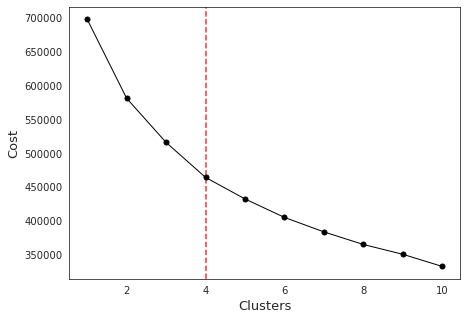

In [225]:
sns.set_style('white')
plt.figure(figsize=(7,5))
plt.axvline(x=4, color='r', ls='--', alpha=0.8)
plt.plot(list(range(1,11)), inertia, linewidth=1, markersize=5, color='black', marker='o',markerfacecolor='black', markeredgecolor='black')
plt.xlabel('Clusters',fontsize=13)
plt.ylabel('Cost',fontsize=13)
plt.show()

In [226]:
model=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_

In [227]:
model.n_clusters

4

In [228]:
df['cluster'] = model.labels_

In [229]:
centers

array([[-9.87315893e-01, -2.77476750e-01,  1.57058043e-01,
         6.84908970e-02,  7.57848834e-02,  5.60390941e-02,
        -3.39288999e-02,  1.12666463e-02, -3.38738837e-02,
        -8.49042514e-03],
       [ 1.51337435e+00,  6.43685923e+00,  1.92209013e+00,
        -1.26385532e-01, -4.09466439e-01, -5.35092062e-02,
        -1.13343395e-02,  3.75245011e-02,  1.53774455e-01,
        -8.94314310e-02],
       [ 5.48284302e+00, -1.80407450e+00,  8.15867898e-01,
        -1.75271753e-01, -2.04501003e-01, -3.46599122e-01,
         3.84258769e-01, -9.99035385e-02,  1.46343813e-01,
         1.02453154e-01],
       [ 1.60075443e+00,  1.81879111e+00, -6.12164614e+00,
        -5.40769745e-01, -3.06562976e-01, -4.52646691e-02,
        -3.12627390e-01,  9.27126154e-03,  4.53301655e-02,
        -5.82350238e-03]])

In [230]:
datac = pd.DataFrame(data=centers)
datac['Labels'] = 4
del datac[3]
del datac[4]

datac.rename(columns={0: 'Component 1', 1: 'Component 2', 2: 'Component 3'},inplace = True)
datac

Component 1  Component 2  Component 3         5         6         7  \
0    -0.987316    -0.277477     0.157058  0.056039 -0.033929  0.011267   
1     1.513374     6.436859     1.922090 -0.053509 -0.011334  0.037525   
2     5.482843    -1.804075     0.815868 -0.346599  0.384259 -0.099904   
3     1.600754     1.818791    -6.121646 -0.045265 -0.312627  0.009271   

          8         9  Labels  
0 -0.033874 -0.008490       4  
1  0.153774 -0.089431       4  
2  0.146344  0.102453       4  
3  0.045330 -0.005824       4

In [231]:
nd = pd.DataFrame()

In [232]:
nd['Componente 1'] = X_pca[:,0]
nd['Componente 2']= X_pca[:,1]
nd['Componente 3']= X_pca[:,2]
nd['Groups']= labels
nd['Clusters']= labels+1
nd['cns'] = gest

nd

Componente 1  Componente 2  Componente 3  Groups  Clusters  \
0         14.992982     68.245978     23.455405       1         2   
1         14.631660     48.697857      4.886263       1         2   
2         10.380528     16.045426     -9.678419       1         2   
3         -0.817698      1.416964      0.301234       0         1   
4          5.784940      0.742676     -2.989768       2         3   
...             ...           ...           ...     ...       ...   
24911     -2.002466     -0.801865      0.424316       0         1   
24912     -1.874165     -0.031541      0.890439       0         1   
24913     -1.874165     -0.031541      0.890439       0         1   
24914     -2.028607     -0.812534      0.587674       0         1   
24915     -2.002466     -0.801865      0.424316       0         1   

                   cns  
0      801440460844755  
1      898001411995246  
2      801440423995818  
3      203901031140009  
4      801440490358689  
...                ...  
24911  898003246771253  
24912  898001481864051  
24913  801440431227441  
24914  801440447728836  
24915  170317444480006  

[24916 rows x 6 columns]

In [233]:
nd = nd.rename(columns={'Componente 1': 'Component 1'})
nd = nd.rename(columns={'Componente 2': 'Component 2'})
nd = nd.rename(columns={'Componente 3': 'Component 3'})

In [234]:
pio.templates.default = "plotly_white"
fig=px.scatter(data_frame=nd,x='Component 1',y='Component 2', color='Clusters')

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [235]:
fig=px.scatter_3d(data_frame=nd,x='Component 1',y='Component 2',z='Component 3')

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [236]:
fig=px.scatter_3d(data_frame=nd,x='Component 1',y='Component 2',z='Component 3', color='Clusters')

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()